 # Urban Sound Neural Network Classification  and Random Forest

In [1]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import librosa.display as disp
import warnings

## Let us visualise each feature for each individual sound class
**The list contains file paths for each sound class**

In [2]:
filepath_list=["/Users/hadysylla/Desktop/urban/UrbanSound8K/audio/fold1/57320-0-0-24.wav",
               "/Users/hadysylla/Desktop/urban/UrbanSound8K/audio/fold1/24074-1-0-4.wav",
               "/Users/hadysylla/Desktop/urban/UrbanSound8K/audio/fold1/143651-2-0-63.wav",
               "/Users/hadysylla/Desktop/urban/UrbanSound8K/audio/fold1/9031-3-3-0.wav",
               "/Users/hadysylla/Desktop/urban/UrbanSound8K/audio/fold1/147764-4-1-0.wav",
               "/Users/hadysylla/Desktop/urban/UrbanSound8K/audio/fold1/143604-5-0-0.wav",
               "/Users/hadysylla/Desktop/urban/UrbanSound8K/audio/fold1/197318-6-3-0.wav",
               "/Users/hadysylla/Desktop/urban/UrbanSound8K/audio/fold1/174276-7-0-0.wav",
               "/Users/hadysylla/Desktop/urban/UrbanSound8K/audio/fold1/157867-8-0-25.wav",
               "/Users/hadysylla/Desktop/urban/UrbanSound8K/audio/fold1/132016-9-0-20.wav"]

## The class_list contains the 10 classes of sounds

In [ ]:
class_list=["air conditioner","car horn","children playing",
"dog bark","drilling","engine idling", "gun shot",
"jackhammer","siren","street music"]

## The following plots are the wave representations of sounds of each class.

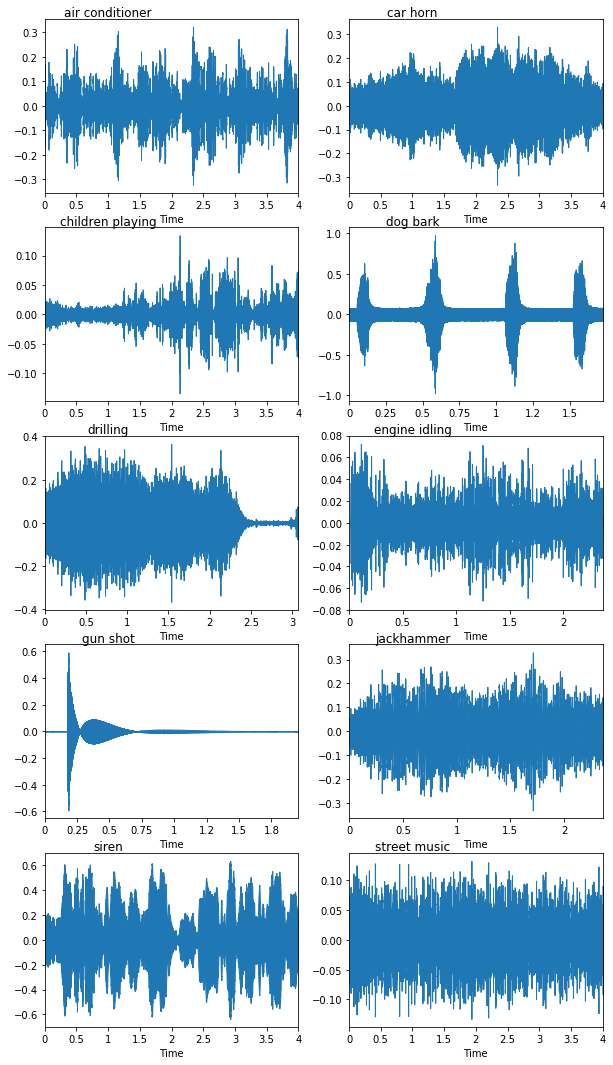

In [3]:
plt.figure(figsize=(10,10))
i=1
for file,label in zip(filepath_list,class_list):
    x, sr =librosa.load(file)
    plt.subplot(5,2,i)
    plt.subplots_adjust(top=1.9,bottom=0.5)
    librosa.display.waveplot(y=x,sr=sr,x_axis="time")
    plt.title(label,x=0.25, y=0.98)
    i+=1

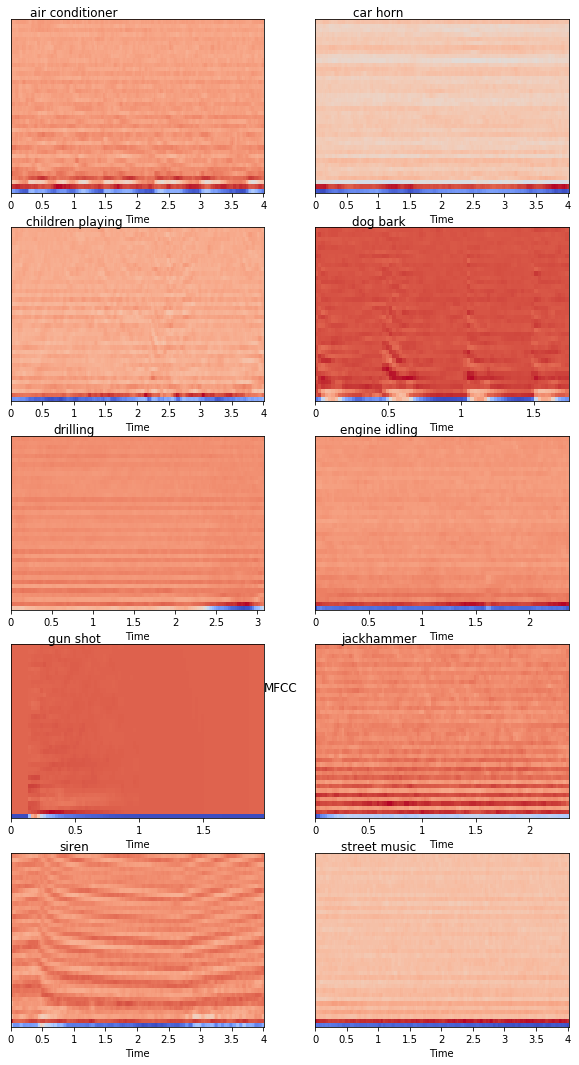

In [4]:
plt.figure(figsize=(10,10))
i=1
for file,label in zip(filepath_list,class_list):
    x, sr =librosa.load(file)
    #MFCC is a coefficient of Mel-frequency which gives good idea of the taxonomy of the sound.
    MFCC=librosa.feature.mfcc(y=x,sr=sr,n_mfcc=40)
    plt.subplot(5,2,i)
    plt.subplots_adjust(top=1.9,bottom=0.5)
    librosa.display.specshow(MFCC,x_axis="time")
    plt.title(label,x=0.25, y=0.98)
    plt.suptitle("MFCC")
    i+=1

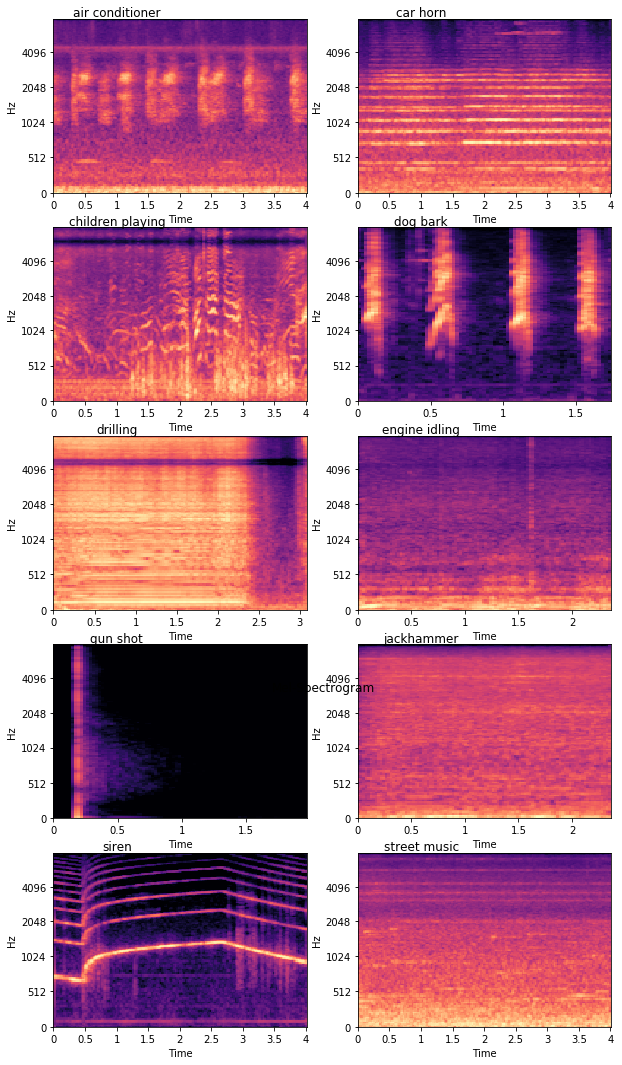

In [5]:
plt.figure(figsize=(10,10))
i=1
for file,label in zip(filepath_list,class_list):
    x, sr =librosa.load(file)
    # Mel spectrograms are Frequency vs Time representation of the sound. This improves the resolution of
# sound data    
    mel=librosa.feature.melspectrogram(x, sr=sr)
    plt.subplot(5,2,i)
    plt.subplots_adjust(top=1.9,bottom=0.5)
    librosa.display.specshow(librosa.power_to_db(mel,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
    plt.title(label,x=0.25, y=0.98)
    i+=1
    plt.suptitle("Mel-Spectrogram")

## The function extracts mfccs and melspectrogram and concatenate them into a single numpy array

In [2]:
def extract_features(audio):
    sound, sample_rate = librosa.load(audio)
    
    mfcc_f =librosa.feature.mfcc(y=sound, sr=sample_rate, n_mfcc=40)
    delta_f=librosa.feature.delta(mfcc_f,mode='nearest')
    mfcc_s = np.mean(mfcc_f.T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(sound),sr=sample_rate).T,axis=0)
    delta_mfcc=np.mean(delta_f.T,axis=0)
    
    return delta_mfcc,mfcc_s,tonnetz
   

## Defining the necessary input files and temporary list to store the iteration values.

In [ ]:
input_dir="F:/hadysylla/Urban/UrbanSound8K/audio"

feature_list=[]
class_list=[] #this list will contain all the class id of the sound data
 #this list will hold all the respective extracted features for each file



In [28]:
for subdir,dirs,files in os.walk(input_dir):
    for file in files:
        f=os.path.join(subdir,file)
        
        try:
            librosa.util.valid_audio(f)
        except:
            continue
        classid=file.split("-")[1] #extracts the class id from the filename
        feature=extract_features(f) #holds the numpy array of audio features
        delta,mfcc,tonnetz=feature
        
        features=np.hstack([delta,mfcc,tonnetz])# mel and mfccs are chossen for thier diemnsional uniformity.
        feature_list.append(features)
        class_list.append(classid)

feat_arr=np.array(feature_list)
class_arr=np.array(class_list)

#these numpy arrays now have respective class id and feature data with parallel relationship.

## Split the data into training and test sets and build a model based on it

In [29]:
warnings.filterwarnings("ignore")
X_train, X_test, y_train, y_test = train_test_split(feat_arr, class_arr, test_size=0.33, random_state=42)
model = MLPClassifier(activation='tanh', solver='adam', hidden_layer_sizes=(100), random_state=1)
model.fit(X=X_train,y=y_train) #fitting the train data to the model
y_pred=model.predict(X_test) #stores the predicted value for the test data
acc=accuracy_score(y_pred,y_test)
print("The Accuracy score of the model is:",acc*100) #accuracy is the totalcorrect values predicted/total values.
loss=model.loss_curve_ #gives the loss curve for each epochs

#The model uses hyperbolic tangent funtion or 'tanh' function as activation function.It is employeed as 
#it has it's output zero centered hence having easier optimisation.
#the solver/optimization algorithm used is  'adam stochastic optimization algorithm' which employees mometum
#for achieving faster decent than normal gradient decent algorithm.

The Accuracy score of the model is: 81.04265402843602


**The Accuracy score of the model is: 81.04265402843602**

## Classes Performance

In [12]:
def correct(y_pred,y_test,c):
    
    index=np.nonzero(y_test==c)[0]
    pr,ts=y_pred[index],y_test[index]
    no_of_correct=np.sum(pr==ts)
    return no_of_correct

In [13]:
metadata=pd.read_csv("F:\\hadysylla\\Urban\\UrbanSound8K\\metadata\\UrbanSound8K.csv")
label=metadata[["classID","class"]].drop_duplicates()
Class_name=label.sort_values("classID")["class"].values

unique,counts=np.unique(y_test,return_counts=True)
acc=[]

for cl,co in zip(unique,counts):
    cor=correct(y_pred,y_test,cl)
    accuracy=(cor/co)*100
    acc.append(accuracy)
accuracy_arr=np.array(acc)
cla=np.array(unique)
result_df=pd.DataFrame({"classID":cla,"Class":Class_name,"Accuracy":acc})
print(result_df)



  classID             Class   Accuracy
0       0   air_conditioner  78.688525
1       1          car_horn  76.595745
2       2  children_playing  63.076923
3       3          dog_bark  72.839506
4       4          drilling  72.262774
5       5     engine_idling  84.931507
6       6          gun_shot  82.926829
7       7        jackhammer  88.750000
8       8             siren  83.116883
9       9      street_music  53.061224


**The Plot shows the learning curve of the model in which,it is observed that the loss gets reduced at 
  each iterations**

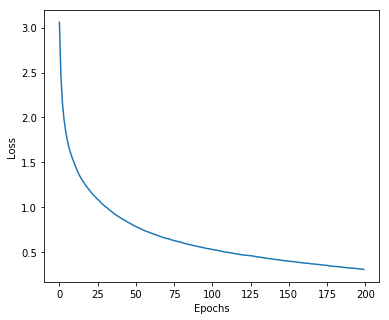

In [10]:
plt.figure(1, figsize = (6,5))
plt.xlabel("Epochs")
plt.ylabel("Loss")
p = plt.plot(loss)
plt.show()

## Confusion Matrix Plot

In [14]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
Normalized confusion matrix


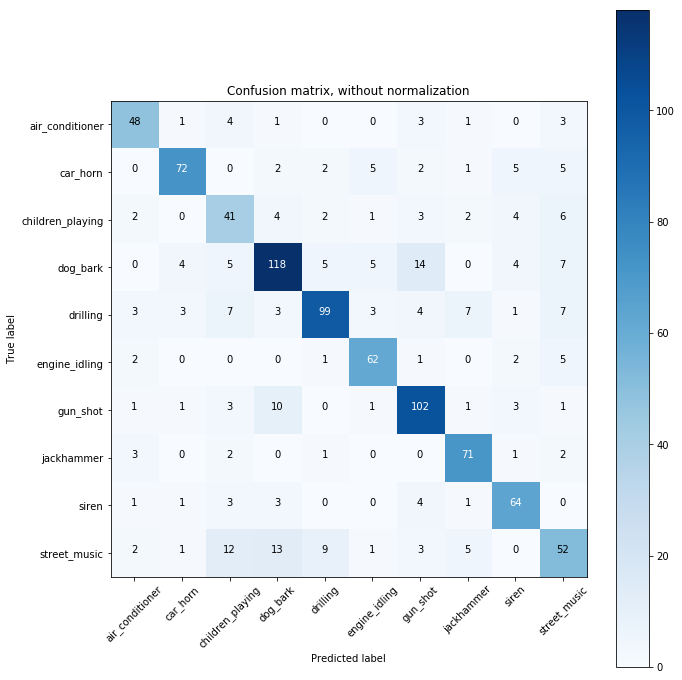

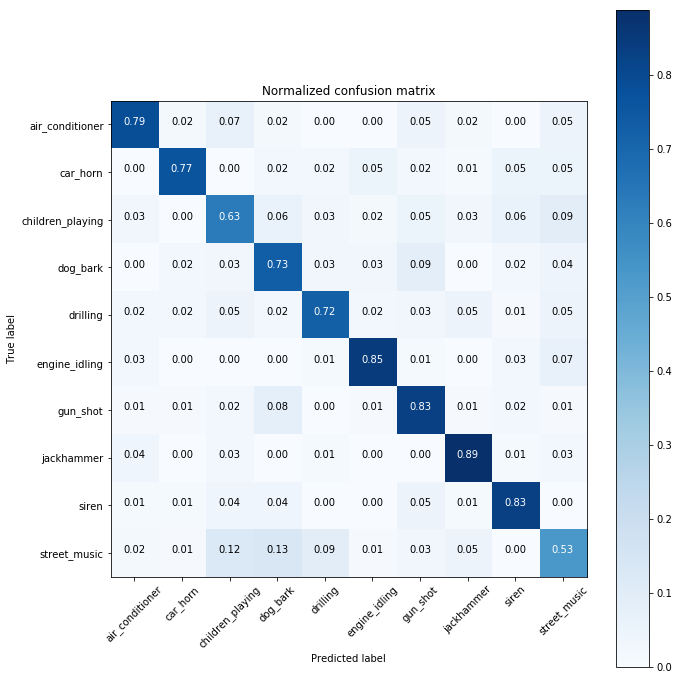

In [15]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=Class_name,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=Class_name, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Random Forest Classifier

In [21]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
forest = OneVsRestClassifier(RandomForestClassifier(n_estimators = 500, max_depth=20, min_samples_leaf=30))
const_forestmodel = forest.fit(X_train, y_train)
cf_prediction = const_forestmodel.predict(X_test)
np.sum(cf_prediction[:816] == y_test[:816]) /y_train.shape[0]

0.2884713052310818

**Accuracy 0.2884713052310818**

## Random Forest Confusion Matrix Plot

Confusion matrix, without normalization
Normalized confusion matrix


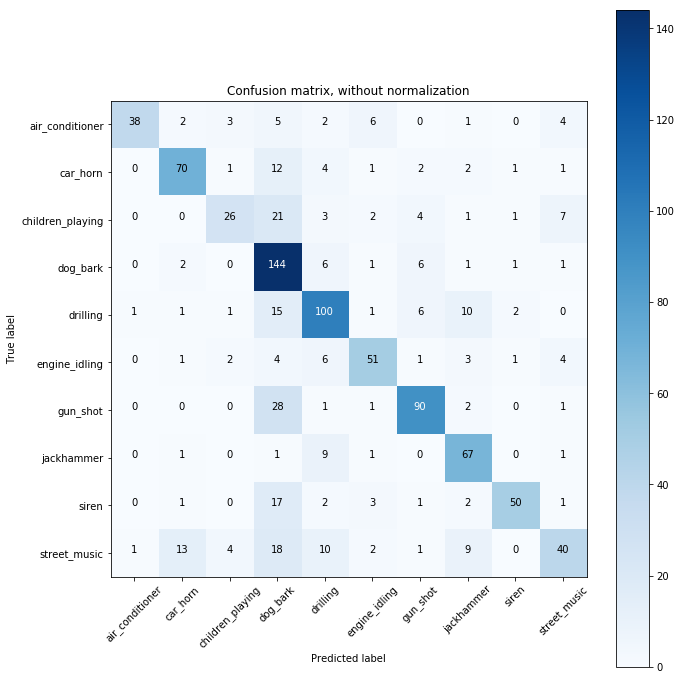

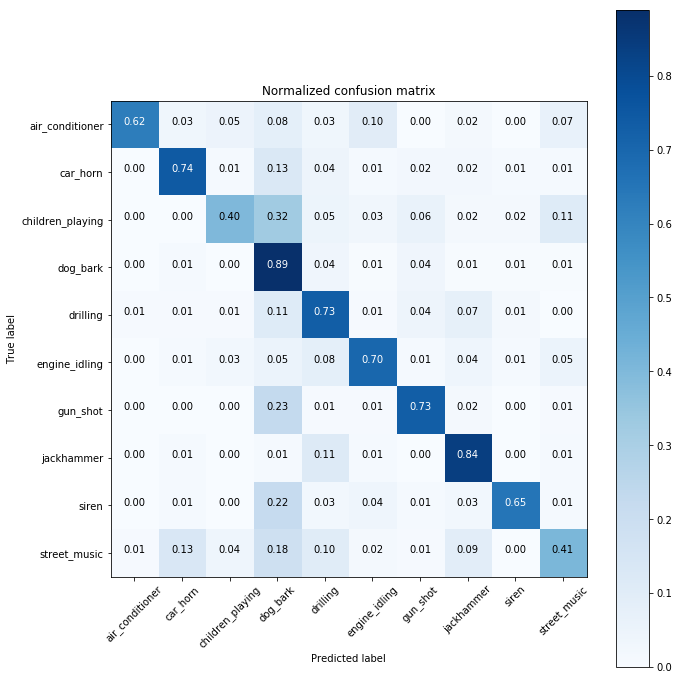

In [22]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, cf_prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=Class_name,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=Class_name, normalize=True,
                      title='Normalized confusion matrix')

plt.show()